# Shipment Delay Prediction

In [14]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle
from flask import Flask, request, jsonify

In [2]:
# Load the dataset
data = pd.read_excel("AI ML Internship Training Data.xlsx")

In [3]:
# Data Overview
print("Dataset Information:")
data.info()
print("\nFirst 5 Rows of Dataset:")
print(data.head())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Shipment ID            20000 non-null  object        
 1   Origin                 20000 non-null  object        
 2   Destination            20000 non-null  object        
 3   Shipment Date          20000 non-null  datetime64[ns]
 4   Planned Delivery Date  20000 non-null  datetime64[ns]
 5   Actual Delivery Date   20000 non-null  datetime64[ns]
 6   Vehicle Type           19403 non-null  object        
 7   Distance (km)          20000 non-null  int64         
 8   Weather Conditions     20000 non-null  object        
 9   Traffic Conditions     20000 non-null  object        
 10  Delayed                20000 non-null  object        
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 1.7+ MB

First 5 Rows of Dataset:
  Shipme

In [4]:
# Data Cleaning
data['Vehicle Type'].fillna(data['Vehicle Type'].mode()[0], inplace=True)
data['Delivery Delay'] = (data['Actual Delivery Date'] - data['Planned Delivery Date']).dt.days
data['Delivery Delay'] = data['Delivery Delay'].apply(lambda x: max(x, 0))

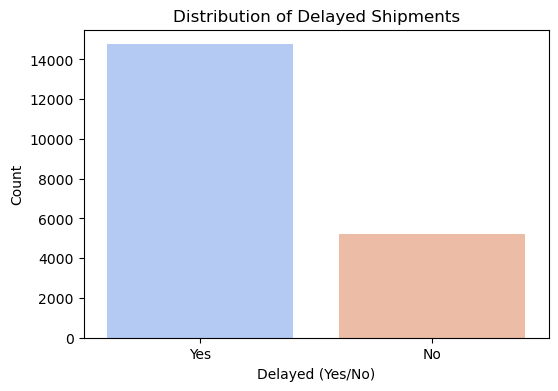

In [5]:
# Target Variable Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Delayed', palette='coolwarm')
plt.title("Distribution of Delayed Shipments")
plt.xlabel("Delayed (Yes/No)")
plt.ylabel("Count")
plt.show()

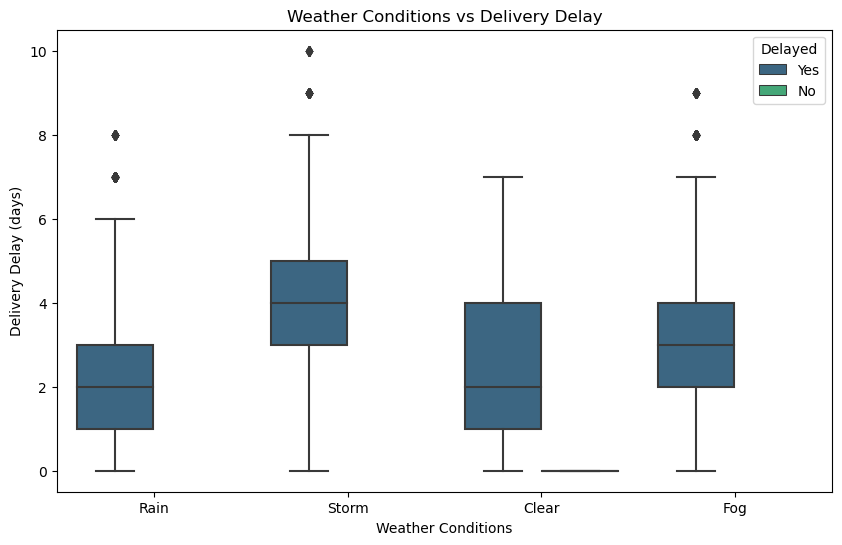

In [6]:
# Visualizing Features
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Weather Conditions', y='Delivery Delay', hue='Delayed', palette='viridis')
plt.title("Weather Conditions vs Delivery Delay")
plt.xlabel("Weather Conditions")
plt.ylabel("Delivery Delay (days)")
plt.legend(title='Delayed')
plt.show()

In [7]:
# Encoding Categorical Variables
label_encoders = {}
categorical_columns = ['Origin', 'Destination', 'Vehicle Type', 'Weather Conditions', 'Traffic Conditions', 'Delayed']
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [8]:
# Preparing Features and Target
X = data[['Origin', 'Destination', 'Vehicle Type', 'Distance (km)', 'Weather Conditions', 'Traffic Conditions', 'Delivery Delay']]
y = data['Delayed']

In [9]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
# Scaling Numerical Features
scaler = StandardScaler()
X_train[['Distance (km)', 'Delivery Delay']] = scaler.fit_transform(X_train[['Distance (km)', 'Delivery Delay']])
X_test[['Distance (km)', 'Delivery Delay']] = scaler.transform(X_test[['Distance (km)', 'Delivery Delay']])

In [22]:
# Save the scaler
with open("scaler.pkl", "wb")as scaler_file:
    pickle.dump(scaler, scaler_file)

In [11]:
# Logistic Regression Model
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print("\nLogistic Regression Report:")
print(classification_report(y_test, y_pred_log))


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1049
           1       1.00      0.99      1.00      2951

    accuracy                           0.99      4000
   macro avg       0.99      1.00      0.99      4000
weighted avg       0.99      0.99      0.99      4000



In [12]:
# Decision Tree Model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
print("\nDecision Tree Report:")
print(classification_report(y_test, y_pred_tree))


Decision Tree Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1049
           1       1.00      1.00      1.00      2951

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



In [13]:
# Random Forest Model
forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)
print("\nRandom Forest Report:")
print(classification_report(y_test, y_pred_forest))


Random Forest Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1049
           1       1.00      1.00      1.00      2951

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



In [15]:
# Function to calculate metrics
def get_metrics(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return {'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}

In [16]:
# Gather metrics for all models
metrics = []
metrics.append(get_metrics("Logistic Regression", y_test, y_pred_log))
metrics.append(get_metrics("Decision Tree", y_test, y_pred_tree))
metrics.append(get_metrics("Random Forest", y_test, y_pred_forest))

In [17]:
# Create a DataFrame for visualization
metrics_df = pd.DataFrame(metrics)

<Figure size 1000x600 with 0 Axes>

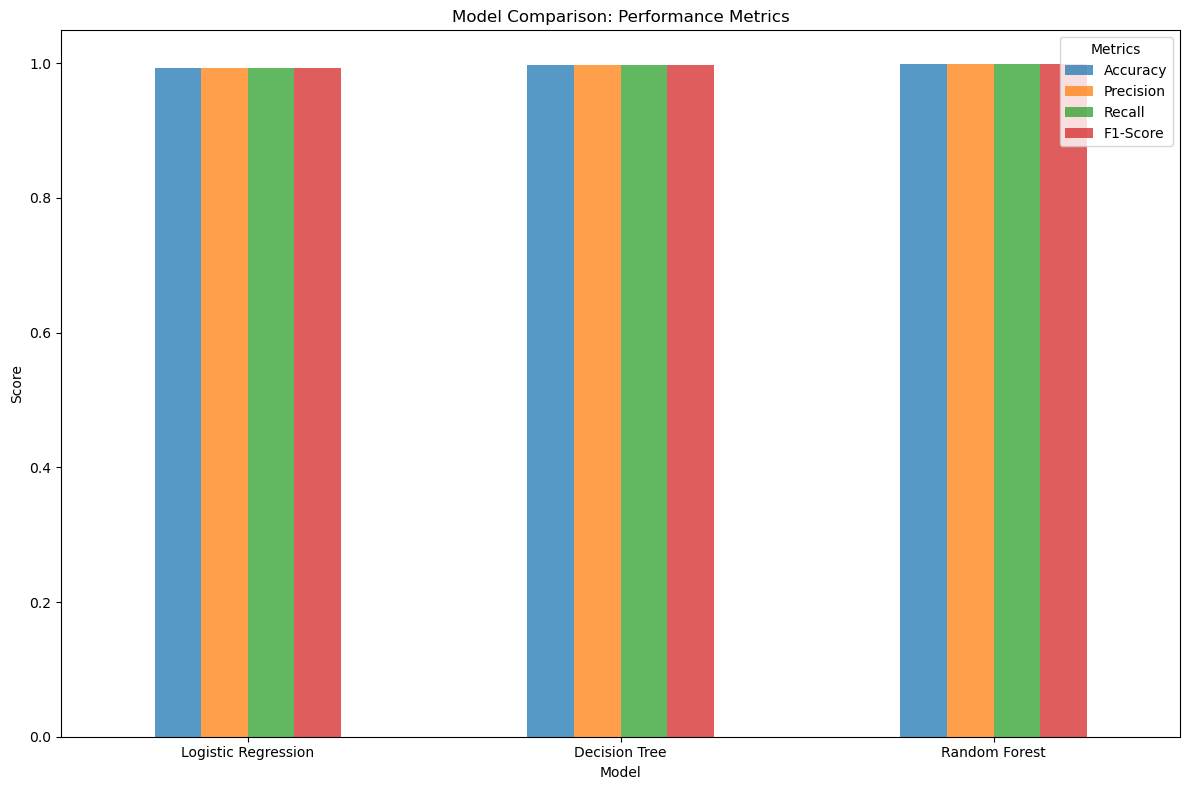

In [18]:
# Plot metrics for comparison
plt.figure(figsize=(10, 6))
metrics_df.set_index('Model').plot(kind='bar', figsize=(12, 8), rot=0, alpha=0.75)
plt.title("Model Comparison: Performance Metrics")
plt.xlabel("Model")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(title="Metrics")
plt.tight_layout()
plt.show()

In [19]:
# Summary Text
best_model = metrics_df.loc[metrics_df['F1-Score'].idxmax()]
print("\nSummary:")
print(f"The best model is *{best_model['Model']}* with the following metrics:")
print(f"Accuracy: {best_model['Accuracy']:.2f}")
print(f"Precision: {best_model['Precision']:.2f}")
print(f"Recall: {best_model['Recall']:.2f}")
print(f"F1-Score: {best_model['F1-Score']:.2f}")


Summary:
The best model is *Random Forest* with the following metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00


In [20]:
# Save the Best Model (Random Forest)
with open("random_forest_model.pkl", "wb") as model_file:
    pickle.dump(forest_model, model_file)